In [2]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
medical = pd.read_csv('medical_eda.csv')


In [4]:
medical.head(20)

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group,very_high_risk
0,19,1,27.900,0,1,southwest,16884.92400,overweight,young,0
1,18,0,33.770,1,0,southeast,1725.55230,obese,young,0
2,28,0,33.000,3,0,southeast,4449.46200,obese,young,0
3,33,0,22.705,0,0,northwest,21984.47061,normal weight,adult,0
4,32,0,28.880,0,0,northwest,3866.85520,overweight,adult,0
5,31,1,25.740,0,0,southeast,3756.62160,overweight,adult,0
6,46,1,33.440,1,0,southeast,8240.58960,obese,middle_age,0
7,37,1,27.740,3,0,northwest,7281.50560,overweight,adult,0
8,37,0,29.830,2,0,northeast,6406.41070,overweight,adult,0
9,60,1,25.840,0,0,northwest,28923.13692,overweight,middle_age,0


In [22]:
medical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1337 non-null   int64  
 1   sex             1337 non-null   int64  
 2   bmi             1337 non-null   float64
 3   children        1337 non-null   int64  
 4   smoker          1337 non-null   int64  
 5   region          1337 non-null   object 
 6   charges         1337 non-null   float64
 7   bmi_category    1337 non-null   object 
 8   age_group       1337 non-null   object 
 9   very_high_risk  1337 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.6+ KB


EDA

medical['sex'] = medical['sex'].map({'male': 0, 'female': 1})


medical['smoker'] = medical['smoker'].map({'no': 0, 'yes': 1})

What is the distribution of medical insurance charges?


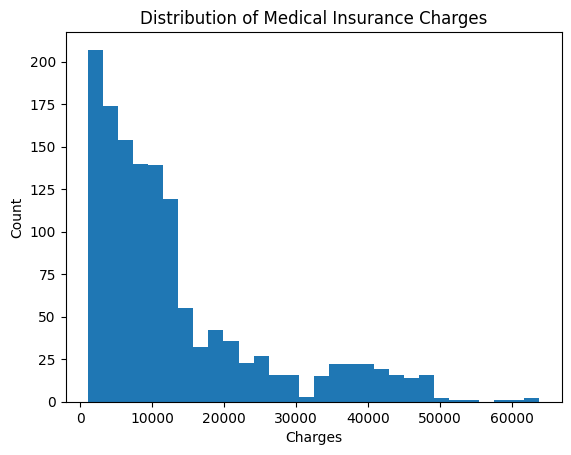

In [39]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(medical["charges"], bins=30)
plt.xlabel("Charges")
plt.ylabel("Count")
plt.title("Distribution of Medical Insurance Charges")
plt.show()


Here with the age the insurance charge goes up.
But as the individual smokes, the charges go even higher 


What is the age distribution of the individuals?




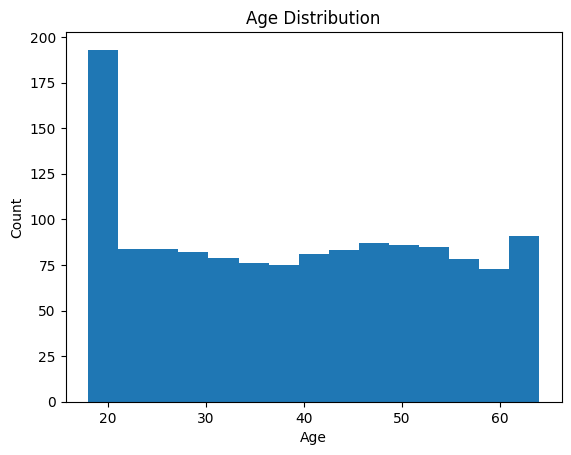

In [27]:

plt.figure()
plt.hist(medical["age"], bins=15)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


In [29]:
medical["age"].skew()


np.float64(0.054780773126998195)

In [30]:
medical["smoker"].value_counts()


smoker
0    1063
1     274
Name: count, dtype: int64

How many people are smokers vs non-smokers?




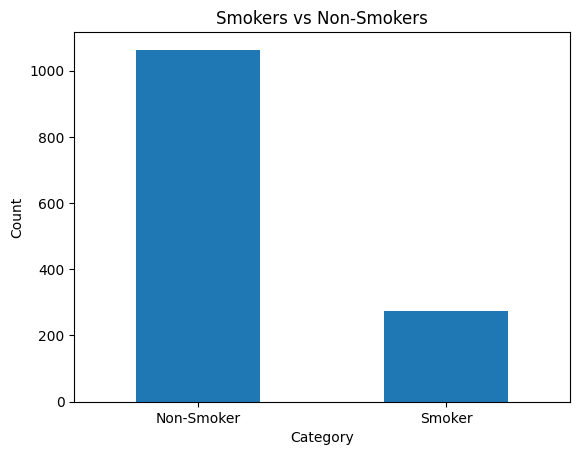

In [31]:
import matplotlib.pyplot as plt

medical["smoker"].value_counts().plot(kind="bar")
plt.xticks([0,1], ["Non-Smoker", "Smoker"], rotation=0)
plt.title("Smokers vs Non-Smokers")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


What is the average BMI in the dataset?




In [32]:
medical["bmi"].mean()


np.float64(30.66345175766642)

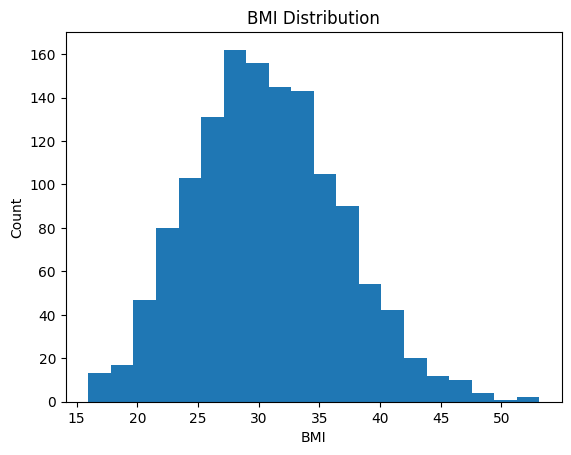

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(medical["bmi"], bins=20)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution")
plt.show()


Which regions have the most number of policyholders?




In [34]:
medical["region"].value_counts()


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

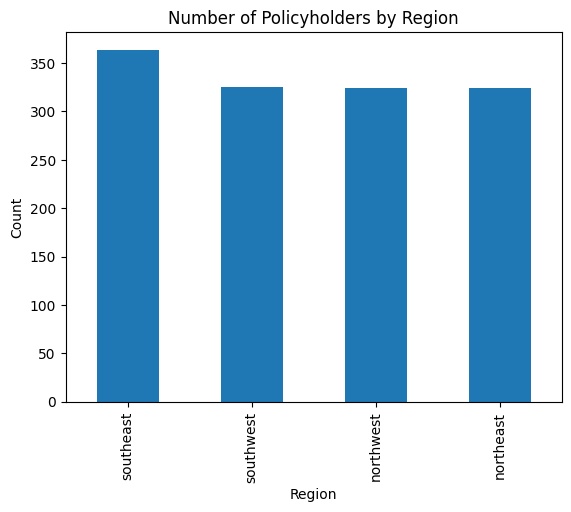

In [35]:
import matplotlib.pyplot as plt

medical["region"].value_counts().plot(kind="bar")
plt.title("Number of Policyholders by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


2. Bivariate Analysis (Two Variables):


How do charges vary with age?




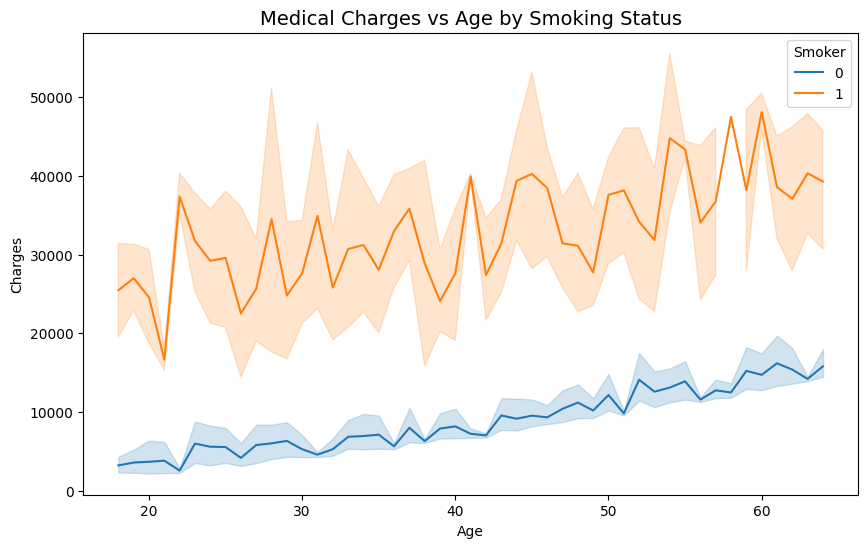

In [40]:


plt.figure(figsize=(10, 6))
sns.lineplot(x=medical['age'], y=medical['charges'], hue='smoker',data=medical)
plt.title('Medical Charges vs Age by Smoking Status', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

Is there a difference in average charges between smokers and non-smokers?




In [42]:
medical.groupby("smoker")["charges"].mean()


smoker
0     8440.660307
1    32050.231832
Name: charges, dtype: float64

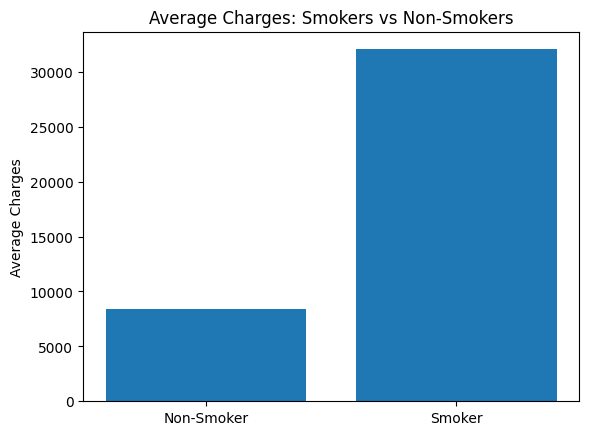

In [43]:
import matplotlib.pyplot as plt

avg_charges = medical.groupby("smoker")["charges"].mean()

plt.figure()
plt.bar(["Non-Smoker", "Smoker"], avg_charges)
plt.title("Average Charges: Smokers vs Non-Smokers")
plt.ylabel("Average Charges")
plt.show()


There is a significant difference in average insurance charges between smokers and non-smokers. Smokers incur substantially higher medical costs, indicating that smoking status is a major factor influencing insurance expenses.

Does BMI impact insurance charges?




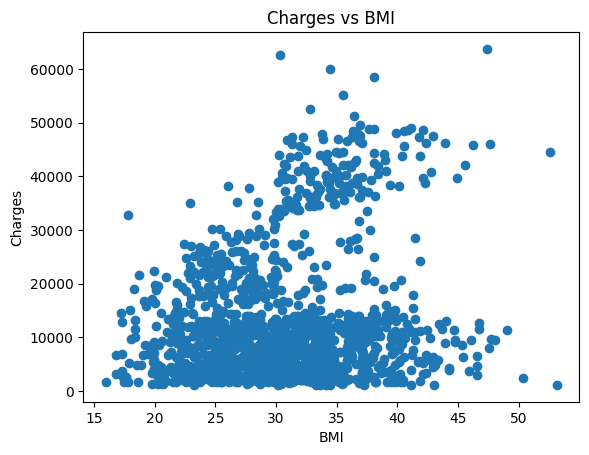

In [44]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(medical["bmi"], medical["charges"])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Charges vs BMI")
plt.show()


In [45]:
medical[["bmi", "charges"]].corr()


,bmi,charges
bmi,1.000000,0.198401
charges,0.198401,1.000000


BMI alone does NOT strongly explain charges


BMI combined with smoking status significantly increases charges.

Do men or women pay more on average?




In [46]:
medical.groupby("sex")["charges"].mean()


sex
0    13974.998864
1    12569.578844
Name: charges, dtype: float64

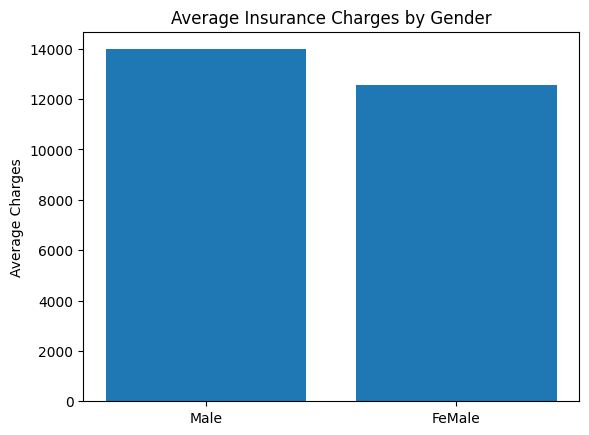

In [48]:
import matplotlib.pyplot as plt

avg_by_gender = medical.groupby("sex")["charges"].mean()

plt.figure()
plt.bar(["Male", "FeMale"], avg_by_gender)
plt.title("Average Insurance Charges by Gender")
plt.ylabel("Average Charges")
plt.show()


Is there a correlation between the number of children and the insurance charges?




In [49]:
medical[["children", "charges"]].corr()


,children,charges
children,1.000000,0.067389
charges,0.067389,1.000000


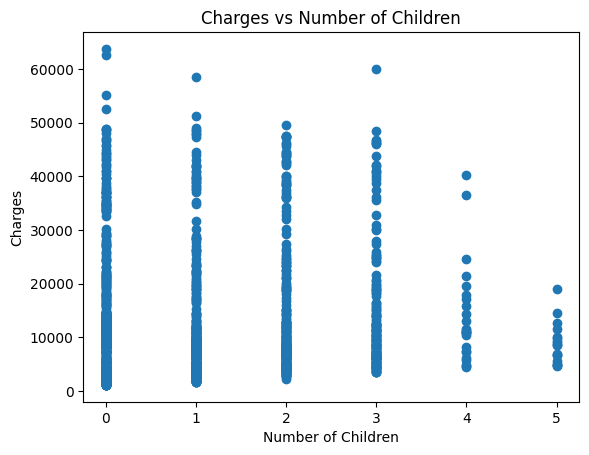

In [50]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(medical["children"], medical["charges"])
plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.title("Charges vs Number of Children")
plt.show()


Very weak correlation

Charges do not increase strongly with more children

Smoking status influences cost much more

What is the impact of gender and region on charges for smokers?




In [51]:
smokers = medical[medical["smoker"] == 1]


In [52]:
smokers.groupby("sex")["charges"].mean().rename(index={0:"Male", 1:"Female"})


sex
Male      33042.005975
Female    30678.996276
Name: charges, dtype: float64

In [53]:
smokers.groupby("region")["charges"].mean()


region
northeast    29673.536473
northwest    30192.003182
southeast    34844.996824
southwest    32269.063494
Name: charges, dtype: float64

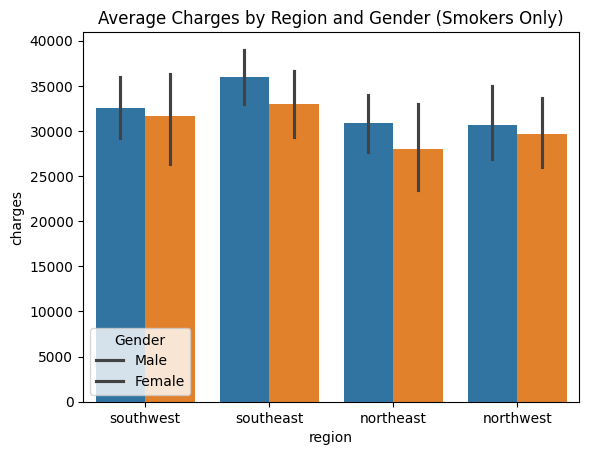

In [56]:
import seaborn as sns

sns.barplot(data=smokers, x="region", y="charges", hue="sex")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.title("Average Charges by Region and Gender (Smokers Only)")
plt.show()


blue=male

orange=female

How do age, BMI, and smoking status together affect insurance cost?




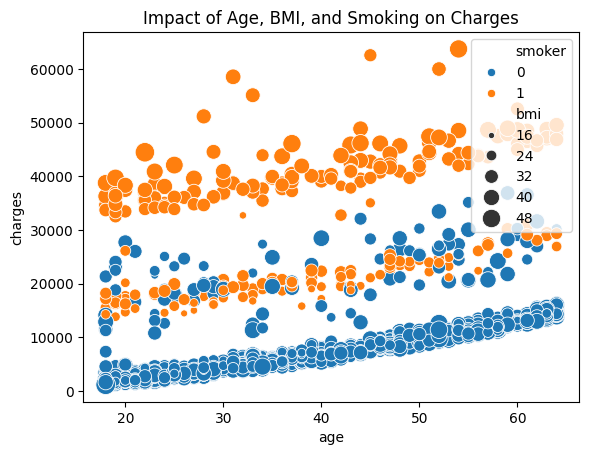

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.scatterplot(
    data=medical,
    x="age",
    y="charges",
    hue="smoker",
    size="bmi",
    sizes=(20, 200)
)
plt.title("Impact of Age, BMI, and Smoking on Charges")
plt.show()


For both smokers and non-smokers:

As age increases → charges increase

The slope is much steeper for smokers

Among smokers (orange), the biggest bubbles (high BMI) are at the very top.

Older + high BMI + smoker = extremely high charges.

Non-Smokers Show Gradual Increase

Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?

In [60]:
obese_smokers = medical[
    (medical["bmi_category"] == "obese") &
    (medical["smoker"] == 1)
]

normal_non_smokers = medical[
    (medical["bmi_category"] == "normal weight") &
    (medical["smoker"] == 0)
]


In [61]:
print("Obese Smokers Average Charges:",
      obese_smokers["charges"].mean())

print("Normal Weight Non-Smokers Average Charges:",
      normal_non_smokers["charges"].mean())


Obese Smokers Average Charges: 41355.8691314966
Normal Weight Non-Smokers Average Charges: 7616.208985204679


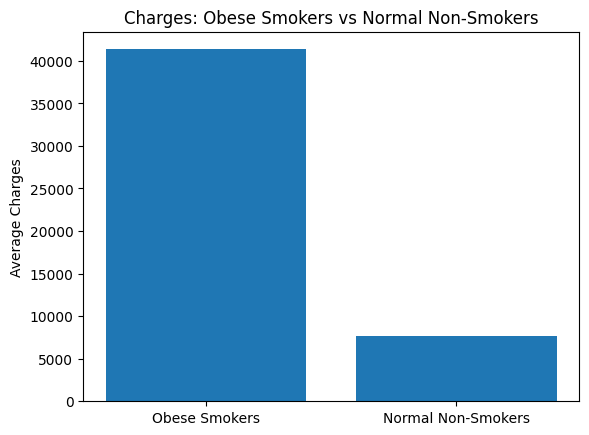

In [62]:
import matplotlib.pyplot as plt

avg_charges = [
    obese_smokers["charges"].mean(),
    normal_non_smokers["charges"].mean()
]

plt.figure()
plt.bar(
    ["Obese Smokers", "Normal Non-Smokers"],
    avg_charges
)
plt.title("Charges: Obese Smokers vs Normal Non-Smokers")
plt.ylabel("Average Charges")
plt.show()


Obese smokers have extremely high charges

Are there outliers in the charges column? Who are the individuals paying the highest costs?


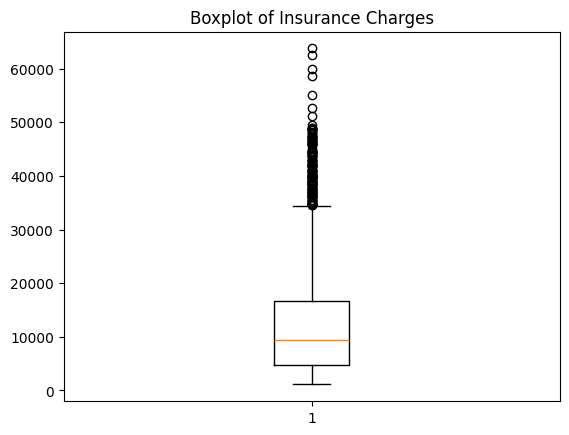

In [63]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(medical["charges"])
plt.title("Boxplot of Insurance Charges")
plt.show()


In [64]:
Q1 = medical["charges"].quantile(0.25)
Q3 = medical["charges"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers = medical[medical["charges"] > upper_bound]

print("Number of Outliers:", len(outliers))


Number of Outliers: 139


Smoking dramatically increases charges.

The dataset has a natural cluster of high-cost smokers.

Are there extreme BMI values that could skew predictions?

In [66]:
medical["bmi"].describe()


count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [67]:
Q1 = medical["bmi"].quantile(0.25)
Q3 = medical["bmi"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

bmi_outliers = medical[
    (medical["bmi"] > upper_bound) |
    (medical["bmi"] < lower_bound)
]

print("Number of BMI Outliers:", len(bmi_outliers))


Number of BMI Outliers: 9


The BMI values range from 15.96 to 53.13, with a mean of 30.66. Although a few individuals exhibit very high BMI values indicative of severe obesity

What is the correlation between numeric features like age, BMI, number of children, and charges?

In [68]:
medical[["age", "bmi", "children", "charges"]].corr()


,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


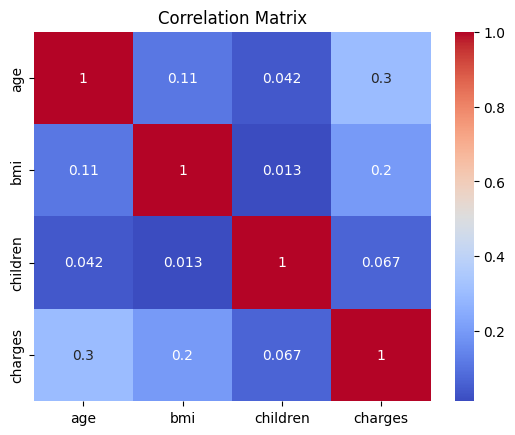

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(
    medical[["age", "bmi", "children", "charges"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")
plt.show()


The correlation analysis shows that age has a moderate positive relationship with insurance charges (r = 0.298), while BMI exhibits a weak positive correlation (r = 0.198). The number of children demonstrates minimal correlation (r = 0.067). Additionally, low inter-feature correlations indicate minimal multicollinearity among predictors. These findings suggest that while age contributes meaningfully to insurance costs, other factors such as smoking status likely play a more dominant role.


Which features have the strongest correlation with the target variable (charges)?


In [71]:
medical.corr(numeric_only=True)["charges"].sort_values(ascending=False)


charges           1.000000
smoker            0.787234
very_high_risk    0.620811
age               0.298308
bmi               0.198401
children          0.067389
sex              -0.058044
Name: charges, dtype: float64

Smoking status exhibits the strongest positive correlation with insurance charges, followed by age and BMI. The number of children shows minimal correlation. This confirms that smoking is the dominant factor influencing insurance costs.